In [1]:
# First Solution - Descriptive Analysys

ratings = open(r'D:\ml-1m\ml-1m\ratings.dat')
rating_distribution = dict()
movieId_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')

    if columns[1] in movieId_count:
        movieId_count[columns[1]] += 1
    else: 
        movieId_count[columns[1]] = 1

    if columns[4] in rating_distribution:
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1

for rating_range in rating_distribution:
    print('{0} {1}'.format(rating_range, int(rating_distribution[rating_range] / sum(rating_distribution.values()) * 100)))

movies = open(r'D:\ml-1m\ml-1m\movies.dat')
movieId_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieId_name[int(columns[0])] = columns[1]
    
sorted_counted_data = sorted(movieId_count.items(), key = lambda x:x[1], reverse=True)[:10]
for movieId, count in sorted_counted_data:
    print(movieId_name[movieId], count)

High 22
Medium 61
Low 16
American Beauty (1999) 3428
Star Wars: Episode IV - A New Hope (1977) 2991
Star Wars: Episode V - The Empire Strikes Back (1980) 2990
Star Wars: Episode VI - Return of the Jedi (1983) 2883
Jurassic Park (1993) 2672
Saving Private Ryan (1998) 2653
Terminator 2: Judgment Day (1991) 2649
Matrix, The (1999) 2590
Back to the Future (1985) 2583
Silence of the Lambs, The (1991) 2578


In [5]:
# second solution 
movies = open(r'D:\ml-1m\ml-1m\movies.dat')
ratings = open(r'D:\ml-1m\ml-1m\ratings.dat')

genre_rating = dict()
movie_id = dict()
genre = dict()
genre_rate = dict()
avg_rating = dict()

# Parse movies.dat
for line in movies:
    line = line.strip()
    column = line.split('::')
    genre_columns = column[2].split('|')  # Extract genres
    movie_id[int(column[0])] = genre_columns

# Parse ratings.dat
for line in ratings:
    line = line.strip()
    column = line.split('::')
    movie_rating = int(column[2])  # Rating
    if int(column[1]) in movie_id:
        for each_genre in movie_id[int(column[1])]:  # Genres for the movie
            if each_genre in genre:
                genre[each_genre] += 1
                genre_rate[each_genre] += movie_rating
            else:
                genre[each_genre] = 1
                genre_rate[each_genre] = movie_rating

# Frequently Rated Genres
sorted_data = sorted(genre.items(), key=lambda x: x[1], reverse=True)
print("Frequently Rated Genres:\n")
for genre_name, count in sorted_data:
    print(f"{genre_name}: {count} ratings")

print("----" * 25)

# Average Ratings for Genres
print("Average Ratings of Genres:\n")
for rate in genre_rate:
    avg_rating[rate] = genre_rate[rate] / genre[rate]  # Fix calculation
list_rate = sorted(avg_rating.items(), key=lambda x: x[1], reverse=True)
for genre_name, avg in list_rate:
    print(f"{genre_name}: {avg:.2f}")


Frequently Rated Genres:

Comedy: 356580 ratings
Drama: 354529 ratings
Action: 257457 ratings
Thriller: 189680 ratings
Sci-Fi: 157294 ratings
Romance: 147523 ratings
Adventure: 133953 ratings
Crime: 79541 ratings
Horror: 76386 ratings
Children's: 72186 ratings
War: 68527 ratings
Animation: 43293 ratings
Musical: 41533 ratings
Mystery: 40178 ratings
Fantasy: 36301 ratings
Western: 20683 ratings
Film-Noir: 18261 ratings
Documentary: 7910 ratings
----------------------------------------------------------------------------------------------------
Average Ratings of Genres:

Film-Noir: 4.08
Documentary: 3.93
War: 3.89
Drama: 3.77
Crime: 3.71
Animation: 3.68
Mystery: 3.67
Musical: 3.67
Western: 3.64
Romance: 3.61
Thriller: 3.57
Comedy: 3.52
Action: 3.49
Adventure: 3.48
Sci-Fi: 3.47
Fantasy: 3.45
Children's: 3.42
Horror: 3.22


In [3]:
# thrid solution - Function to load user demographics
def load_user_demographics(file_path):
    user_demographics = {}
    with open(file_path, 'r') as users_file:
        for line in users_file:
            user_id, gender, age, occupation, _ = line.strip().split('::')
            user_demographics[user_id] = {
                'gender': gender,
                'age': int(age),
                'occupation': occupation
            }
    return user_demographics

# Function to load user ratings
def load_user_ratings(file_path):
    user_ratings_count = {}
    user_ratings = {}
    with open(file_path, 'r') as ratings_file:
        for line in ratings_file:
            user_id, _, rating, _ = line.strip().split('::')
            rating = float(rating)
            if user_id not in user_ratings_count:
                user_ratings_count[user_id] = 0
                user_ratings[user_id] = []
            user_ratings_count[user_id] += 1
            user_ratings[user_id].append(rating)
    return user_ratings_count, user_ratings

# Function to calculate and display user engagement analysis
def analyze_user_engagement(users_file, ratings_file):
    # Load data
    user_demographics = load_user_demographics(users_file)
    user_ratings_count, user_ratings = load_user_ratings(ratings_file)

    # Most Active Users
    print("Most Active Users (Top 10):")
    top_users = sorted(user_ratings_count.items(), key=lambda x: x[1], reverse=True)[:10]
    for user_id, count in top_users:
        print(f"UserID: {user_id}, Ratings: {count}")

    # Average Ratings by Gender
    gender_ratings = {}
    for user_id, ratings in user_ratings.items():
        gender = user_demographics[user_id]['gender']
        if gender not in gender_ratings:
            gender_ratings[gender] = []
        gender_ratings[gender].extend(ratings)

    print("\nAverage Ratings by Gender:")
    for gender, ratings in gender_ratings.items():
        print(f"Gender: {gender}, Avg Rating: {sum(ratings) / len(ratings):.2f}")

    # Average Ratings by Age Group
    age_ratings = {}
    for user_id, ratings in user_ratings.items():
        age_group = (user_demographics[user_id]['age'] // 10) * 10
        if age_group not in age_ratings:
            age_ratings[age_group] = []
        age_ratings[age_group].extend(ratings)

    print("\nAverage Ratings by Age Group:")
    for age_group in sorted(age_ratings):
        ratings = age_ratings[age_group]
        print(f"Age Group: {age_group}-{age_group+9}, Avg Rating: {sum(ratings) / len(ratings):.2f}")

    # Average Ratings by Occupation
    occupation_ratings = {}
    for user_id, ratings in user_ratings.items():
        occupation = user_demographics[user_id]['occupation']
        if occupation not in occupation_ratings:
            occupation_ratings[occupation] = []
        occupation_ratings[occupation].extend(ratings)

    print("\nAverage Ratings by Occupation:")
    for occupation, ratings in occupation_ratings.items():
        print(f"Occupation: {occupation}, Avg Rating: {sum(ratings) / len(ratings):.2f}")

# Main Function
if __name__ == "__main__":
    # File paths (replace with your actual paths)
    users_file = r"D:\ml-1m\ml-1m\users.dat"
    ratings_file = r"D:\ml-1m\ml-1m\ratings.dat"

    # Analyze user engagement
    analyze_user_engagement(users_file, ratings_file)


Most Active Users (Top 10):
UserID: 4169, Ratings: 2314
UserID: 1680, Ratings: 1850
UserID: 4277, Ratings: 1743
UserID: 1941, Ratings: 1595
UserID: 1181, Ratings: 1521
UserID: 889, Ratings: 1518
UserID: 3618, Ratings: 1344
UserID: 2063, Ratings: 1323
UserID: 1150, Ratings: 1302
UserID: 1015, Ratings: 1286

Average Ratings by Gender:
Gender: F, Avg Rating: 3.62
Gender: M, Avg Rating: 3.57

Average Ratings by Age Group:
Age Group: 0-9, Avg Rating: 3.55
Age Group: 10-19, Avg Rating: 3.51
Age Group: 20-29, Avg Rating: 3.55
Age Group: 30-39, Avg Rating: 3.62
Age Group: 40-49, Avg Rating: 3.64
Age Group: 50-59, Avg Rating: 3.73

Average Ratings by Occupation:
Occupation: 10, Avg Rating: 3.53
Occupation: 16, Avg Rating: 3.60
Occupation: 15, Avg Rating: 3.69
Occupation: 7, Avg Rating: 3.60
Occupation: 20, Avg Rating: 3.50
Occupation: 9, Avg Rating: 3.66
Occupation: 1, Avg Rating: 3.58
Occupation: 12, Avg Rating: 3.65
Occupation: 17, Avg Rating: 3.61
Occupation: 0, Avg Rating: 3.54
Occupation: 

In [16]:
#fourth solution 
import pandas as pd

# File paths
movies_path = r"D:\ml-1m\ml-1m\movies.dat"
ratings_path = r"D:\ml-1m\ml-1m\ratings.dat"
users_path = r"D:\ml-1m\ml-1m\users.dat"

# Load the data
movies = pd.read_csv(movies_path, sep="::", names=["MovieID", "Title", "Genres"], engine="python", encoding="ISO-8859-1")
ratings = pd.read_csv(ratings_path, sep="::", names=["UserID", "MovieID", "Rating", "Timestamp"], engine="python", encoding="ISO-8859-1")
users = pd.read_csv(users_path, sep="::", names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], engine="python", encoding="ISO-8859-1")

# Merge data to combine ratings, movies, and users
data = pd.merge(ratings, movies, on="MovieID")
data = pd.merge(data, users, on="UserID")

# Investigate how ratings vary by user demographic attributes (age, gender, occupation)

# Average ratings by gender, age, and occupation
avg_ratings_by_gender = data.groupby("Gender")["Rating"].mean()
avg_ratings_by_age = data.groupby("Age")["Rating"].mean()
avg_ratings_by_occupation = data.groupby("Occupation")["Rating"].mean()

# Display the results
print("Average Ratings by Gender:")
print(avg_ratings_by_gender)
print("\nAverage Ratings by Age Group:")
print(avg_ratings_by_age)
print("\nAverage Ratings by Occupation:")
print(avg_ratings_by_occupation)

print('--------------'*20)
#  Are there specific genres preferred by certain age groups or occupations?

# Explode the genres to analyze individual genres
data["Genres"] = data["Genres"].str.split("|")
genres_exploded = data.explode("Genres")

# Average ratings by genre and age
avg_genre_rating_by_age = genres_exploded.groupby(["Age", "Genres"])["Rating"].mean().unstack()

# Average ratings by genre and occupation
avg_genre_rating_by_occupation = genres_exploded.groupby(["Occupation", "Genres"])["Rating"].mean().unstack()

# Display the results
print("\nAverage Ratings for Genres by Age Group:")
print(avg_genre_rating_by_age)
print("\nAverage Ratings for Genres by Occupation:")
print(avg_genre_rating_by_occupation)


Average Ratings by Gender:
Gender
F    3.620366
M    3.568879
Name: Rating, dtype: float64

Average Ratings by Age Group:
Age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: Rating, dtype: float64

Average Ratings by Occupation:
Occupation
0     3.537544
1     3.576642
2     3.573081
3     3.656516
4     3.536793
5     3.537529
6     3.661578
7     3.599772
8     3.466741
9     3.656589
10    3.532675
11    3.617371
12    3.654001
13    3.781736
14    3.618481
15    3.689774
16    3.596575
17    3.613574
18    3.530117
19    3.414050
20    3.497392
Name: Rating, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Average Ratings for Genres by Age Group:
Genres    Action  Adventure  A

In [15]:
#Fifth Solution - 
import pandas as pd

# File paths
movies_path = r"D:\ml-1m\ml-1m\movies.dat"
ratings_path = r"D:\ml-1m\ml-1m\ratings.dat"

# Load the data
movies = pd.read_csv(movies_path, sep="::", names=["MovieID", "Title", "Genres"], engine="python", encoding="ISO-8859-1")
ratings = pd.read_csv(ratings_path, sep="::", names=["UserID", "MovieID", "Rating", "Timestamp"], engine="python", encoding="ISO-8859-1")

# Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness)
# Group by MovieID to calculate the average rating and the number of ratings
rating_stats = ratings.groupby("MovieID").agg(
    avg_rating=("Rating", "mean"),
    num_ratings=("Rating", "count")
)

# Set the minimum number of ratings required
min_ratings_threshold = 100

# Filter movies with a minimum number of ratings
top_movies = rating_stats[rating_stats["num_ratings"] >= min_ratings_threshold].sort_values(by="avg_rating", ascending=False)

# Display top-rated movies
print("Top-Rated Movies with Minimum Ratings Threshold:")
top_movies_with_details = top_movies.join(movies.set_index("MovieID")[["Title", "Genres"]])
print(top_movies_with_details[['Title', 'avg_rating', 'Genres', 'num_ratings']].head(10))

print('--------------'*20)

# Analyze the characteristics of top-rated movies (e.g., release year, genres)
# Extract the release year from the Title column
top_movies_with_details['Release_Year'] = top_movies_with_details['Title'].str[-5:-1]

# Display the characteristics of top-rated movies
print("\nTop-Rated Movies Characteristics:")
print(top_movies_with_details[['Title', 'Release_Year', 'Genres', 'avg_rating', 'num_ratings']].head(10))


Top-Rated Movies with Minimum Ratings Threshold:
                                                     Title  avg_rating  \
MovieID                                                                  
2019     Seven Samurai (The Magnificent Seven) (Shichin...    4.560510   
318                       Shawshank Redemption, The (1994)    4.554558   
858                                  Godfather, The (1972)    4.524966   
745                                  Close Shave, A (1995)    4.520548   
50                              Usual Suspects, The (1995)    4.517106   
527                                Schindler's List (1993)    4.510417   
1148                            Wrong Trousers, The (1993)    4.507937   
922          Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    4.491489   
1198                        Raiders of the Lost Ark (1981)    4.477725   
904                                     Rear Window (1954)    4.476190   

                            Genres  num_ratings  
MovieID     

In [3]:
# six solution -  Exploring Long Tail
from collections import defaultdict
import numpy as np

# Initialize data structures
user_ratings = defaultdict(list)  
movie_genres = {}  
movie_release_years = {}  
movie_rating_counts = defaultdict(int)  

# File paths
movies_path = r'D:\ml-1m\ml-1m\movies.dat'  
ratings_path = r'D:\ml-1m\ml-1m\ratings.dat'  

# Load movies data
with open(movies_path, 'r') as f:
    for line in f:
        movie_id, title, genres = line.strip().split('::')
        movie_genres[movie_id] = genres.split('|')
        movie_release_years[movie_id] = title[-5:-1]  # Extract release year from title

# Load ratings data
with open(ratings_path, 'r') as f:
    for line in f:
        user_id, movie_id, rating, _timestamp = line.strip().split('::')
        user_ratings[user_id].append((float(rating), movie_id))
        movie_rating_counts[movie_id] += 1

# Calculate average ratings for each movie
movie_avg_ratings = defaultdict(list)
for user_id, ratings in user_ratings.items():
    for rating, movie_id in ratings:
        movie_avg_ratings[movie_id].append(rating)

movie_avg = {movie_id: np.mean(ratings) for movie_id, ratings in movie_avg_ratings.items()}

# Filter movies with a minimum ratings threshold
min_ratings_threshold = 100
filtered_movie_avg = {
    movie_id: avg 
    for movie_id, avg in movie_avg.items() 
    if movie_rating_counts[movie_id] >= min_ratings_threshold
}

# Sort movies by average rating in descending order
top_movies = sorted(filtered_movie_avg.items(), key=lambda x: x[1], reverse=True)

# Print top-rated movies
print("Top-Rated Movies (Filtered by Minimum Ratings Threshold):")
for movie_id, avg_rating in top_movies[:10]:  # Top 10 movies
    release_year = movie_release_years.get(movie_id, "Unknown")
    genres = movie_genres.get(movie_id, [])
    print(f"Movie ID: {movie_id}, Avg Rating: {avg_rating:.2f}, Release Year: {release_year}, Genres: {', '.join(genres)}")

# Analyze genre distribution for top-rated movies
genre_count = defaultdict(int)
for movie_id, avg_rating in top_movies[:10]:
    genres = movie_genres.get(movie_id, [])
    for genre in genres:
        genre_count[genre] += 1

print("\nGenre Distribution for Top-Rated Movies:")
for genre, count in sorted(genre_count.items(), key=lambda x: x[1], reverse=True):
    print(f"Genre: {genre}, Count: {count}")

# Analyze release year distribution for top-rated movies
year_count = defaultdict(int)
for movie_id, avg_rating in top_movies[:10]:
    release_year = movie_release_years.get(movie_id, "Unknown")
    year_count[release_year] += 1

print("\nRelease Year Distribution for Top-Rated Movies:")
for year, count in sorted(year_count.items(), key=lambda x: x[1], reverse=True):
    print(f"Release Year: {year}, Count: {count}")


Top-Rated Movies (Filtered by Minimum Ratings Threshold):
Movie ID: 2019, Avg Rating: 4.56, Release Year: 1954, Genres: Action, Drama
Movie ID: 318, Avg Rating: 4.55, Release Year: 1994, Genres: Drama
Movie ID: 858, Avg Rating: 4.52, Release Year: 1972, Genres: Action, Crime, Drama
Movie ID: 745, Avg Rating: 4.52, Release Year: 1995, Genres: Animation, Comedy, Thriller
Movie ID: 50, Avg Rating: 4.52, Release Year: 1995, Genres: Crime, Thriller
Movie ID: 527, Avg Rating: 4.51, Release Year: 1993, Genres: Drama, War
Movie ID: 1148, Avg Rating: 4.51, Release Year: 1993, Genres: Animation, Comedy
Movie ID: 922, Avg Rating: 4.49, Release Year: 1950, Genres: Film-Noir
Movie ID: 1198, Avg Rating: 4.48, Release Year: 1981, Genres: Action, Adventure
Movie ID: 904, Avg Rating: 4.48, Release Year: 1954, Genres: Mystery, Thriller

Genre Distribution for Top-Rated Movies:
Genre: Drama, Count: 4
Genre: Action, Count: 3
Genre: Thriller, Count: 3
Genre: Crime, Count: 2
Genre: Animation, Count: 2
Genre

In [4]:
# six solution -1
# Threshold for defining "few ratings"
few_ratings_threshold = 10

# Count movies with very few ratings
long_tail_movies = [
    movie_id 
    for movie_id, count in movie_rating_counts.items() 
    if count < few_ratings_threshold
]

# Total number of movies with very few ratings
num_long_tail_movies = len(long_tail_movies)

# Total number of movies in the dataset
total_movies = len(movie_rating_counts)

print(f"Total number of movies: {total_movies}")
print(f"Number of movies with fewer than {few_ratings_threshold} ratings: {num_long_tail_movies}")
print(f"Percentage of movies with fewer than {few_ratings_threshold} ratings: {(num_long_tail_movies / total_movies) * 100:.2f}%")


Total number of movies: 3706
Number of movies with fewer than 10 ratings: 446
Percentage of movies with fewer than 10 ratings: 12.03%


In [5]:
# six solution -2
# Define thresholds for "less-rated" and "popular" movies
less_rated_threshold = 10  # Fewer than 10 ratings
popular_threshold = 100  # More than 100 ratings

# Categorize movies
less_rated_movies = {
    movie_id: {
        'release_year': movie_release_years.get(movie_id, "Unknown"),
        'genres': movie_genres.get(movie_id, []),
        'avg_rating': movie_avg.get(movie_id, 0),
    }
    for movie_id, count in movie_rating_counts.items()
    if count < less_rated_threshold
}

popular_movies = {
    movie_id: {
        'release_year': movie_release_years.get(movie_id, "Unknown"),
        'genres': movie_genres.get(movie_id, []),
        'avg_rating': movie_avg.get(movie_id, 0),
    }
    for movie_id, count in movie_rating_counts.items()
    if count > popular_threshold
}

# Analyze genre distribution
def genre_distribution(movies):
    genre_count = defaultdict(int)
    for movie in movies.values():
        for genre in movie['genres']:
            genre_count[genre] += 1
    return genre_count

less_rated_genre_dist = genre_distribution(less_rated_movies)
popular_genre_dist = genre_distribution(popular_movies)

# Analyze release year distribution
def year_distribution(movies):
    year_count = defaultdict(int)
    for movie in movies.values():
        year = movie['release_year']
        year_count[year] += 1
    return year_count

less_rated_year_dist = year_distribution(less_rated_movies)
popular_year_dist = year_distribution(popular_movies)

# Display results
print(f"Number of Less-Rated Movies: {len(less_rated_movies)}")
print(f"Number of Popular Movies: {len(popular_movies)}\n")

print("Genre Distribution for Less-Rated Movies:")
for genre, count in sorted(less_rated_genre_dist.items(), key=lambda x: x[1], reverse=True):
    print(f"  Genre: {genre}, Count: {count}")

print("\nGenre Distribution for Popular Movies:")
for genre, count in sorted(popular_genre_dist.items(), key=lambda x: x[1], reverse=True):
    print(f"  Genre: {genre}, Count: {count}")

print("\nRelease Year Distribution for Less-Rated Movies:")
for year, count in sorted(less_rated_year_dist.items(), key=lambda x: x[1], reverse=True):
    print(f"  Year: {year}, Count: {count}")

print("\nRelease Year Distribution for Popular Movies:")
for year, count in sorted(popular_year_dist.items(), key=lambda x: x[1], reverse=True):
    print(f"  Year: {year}, Count: {count}")


Number of Less-Rated Movies: 446
Number of Popular Movies: 2006

Genre Distribution for Less-Rated Movies:
  Genre: Drama, Count: 236
  Genre: Comedy, Count: 109
  Genre: Documentary, Count: 39
  Genre: Thriller, Count: 32
  Genre: Romance, Count: 29
  Genre: Horror, Count: 28
  Genre: Action, Count: 25
  Genre: Adventure, Count: 14
  Genre: Crime, Count: 13
  Genre: Sci-Fi, Count: 10
  Genre: Mystery, Count: 7
  Genre: War, Count: 6
  Genre: Children's, Count: 6
  Genre: Musical, Count: 6
  Genre: Western, Count: 6
  Genre: Film-Noir, Count: 4
  Genre: Fantasy, Count: 2
  Genre: Animation, Count: 1

Genre Distribution for Popular Movies:
  Genre: Drama, Count: 718
  Genre: Comedy, Count: 702
  Genre: Action, Count: 391
  Genre: Thriller, Count: 336
  Genre: Romance, Count: 276
  Genre: Sci-Fi, Count: 217
  Genre: Adventure, Count: 205
  Genre: Horror, Count: 185
  Genre: Children's, Count: 166
  Genre: Crime, Count: 127
  Genre: War, Count: 102
  Genre: Musical, Count: 87
  Genre: Ani

In [7]:
#seven solution-1
from collections import defaultdict

# File path to movies data
movies_path = r'D:\ml-1m\ml-1m\movies.dat'

# Dictionary to store genres and their counts
genre_frequency = defaultdict(int)

# Load movies data and count genres
with open(movies_path, 'r') as f:
    for line in f:
        movie_id, title, genres = line.strip().split('::')
        for genre in genres.split('|'):
            genre_frequency[genre] += 1

# Sort genres by frequency
sorted_genres = sorted(genre_frequency.items(), key=lambda x: x[1], reverse=True)

# Display most frequently used genres
print("Most Frequently Used Genres:")
for genre, count in sorted_genres:
    print(f"Genre: {genre}, Count: {count}")


Most Frequently Used Genres:
Genre: Drama, Count: 1603
Genre: Comedy, Count: 1200
Genre: Action, Count: 503
Genre: Thriller, Count: 492
Genre: Romance, Count: 471
Genre: Horror, Count: 343
Genre: Adventure, Count: 283
Genre: Sci-Fi, Count: 276
Genre: Children's, Count: 251
Genre: Crime, Count: 211
Genre: War, Count: 143
Genre: Documentary, Count: 127
Genre: Musical, Count: 114
Genre: Mystery, Count: 106
Genre: Animation, Count: 105
Genre: Fantasy, Count: 68
Genre: Western, Count: 68
Genre: Film-Noir, Count: 44


In [8]:
# seven solution-2

movie_ratings = defaultdict(list)  # Dictionary to store ratings for each movie
movie_genres = {}  # Dictionary to store genres for each movie

# File paths
ratings_path = r'D:\ml-1m\ml-1m\ratings.dat'

# Load movie genres from movies.dat
with open(movies_path, 'r') as f:
    for line in f:
        movie_id, title, genres = line.strip().split('::')
        movie_genres[movie_id] = genres.split('|')

# Load ratings from ratings.dat
with open(ratings_path, 'r') as f:
    for line in f:
        user_id, movie_id, rating, _timestamp = line.strip().split('::')
        movie_ratings[movie_id].append(float(rating))

# Calculate average rating for each movie
movie_avg_ratings = {movie_id: sum(ratings) / len(ratings) for movie_id, ratings in movie_ratings.items()}

# Analyze genre ratings
genre_ratings = defaultdict(list)

for movie_id, avg_rating in movie_avg_ratings.items():
    genres = movie_genres.get(movie_id, [])
    for genre in genres:
        genre_ratings[genre].append(avg_rating)

# Calculate average rating per genre
genre_avg_ratings = {genre: sum(ratings) / len(ratings) for genre, ratings in genre_ratings.items()}

# Display genre ratings
print("\nAverage Rating by Genre:")
for genre, avg_rating in sorted(genre_avg_ratings.items(), key=lambda x: x[1], reverse=True):
    print(f"Genre: {genre}, Avg Rating: {avg_rating:.2f}")




Average Rating by Genre:
Genre: Film-Noir, Avg Rating: 3.81
Genre: Documentary, Avg Rating: 3.69
Genre: War, Avg Rating: 3.59
Genre: Western, Avg Rating: 3.47
Genre: Mystery, Avg Rating: 3.44
Genre: Drama, Avg Rating: 3.42
Genre: Musical, Avg Rating: 3.39
Genre: Crime, Avg Rating: 3.39
Genre: Animation, Avg Rating: 3.36
Genre: Romance, Avg Rating: 3.34
Genre: Thriller, Avg Rating: 3.23
Genre: Comedy, Avg Rating: 3.16
Genre: Adventure, Avg Rating: 3.10
Genre: Fantasy, Avg Rating: 3.10
Genre: Action, Avg Rating: 3.10
Genre: Sci-Fi, Avg Rating: 3.07
Genre: Children's, Avg Rating: 3.01
Genre: Horror, Avg Rating: 2.73


Q8 Visualization Projects

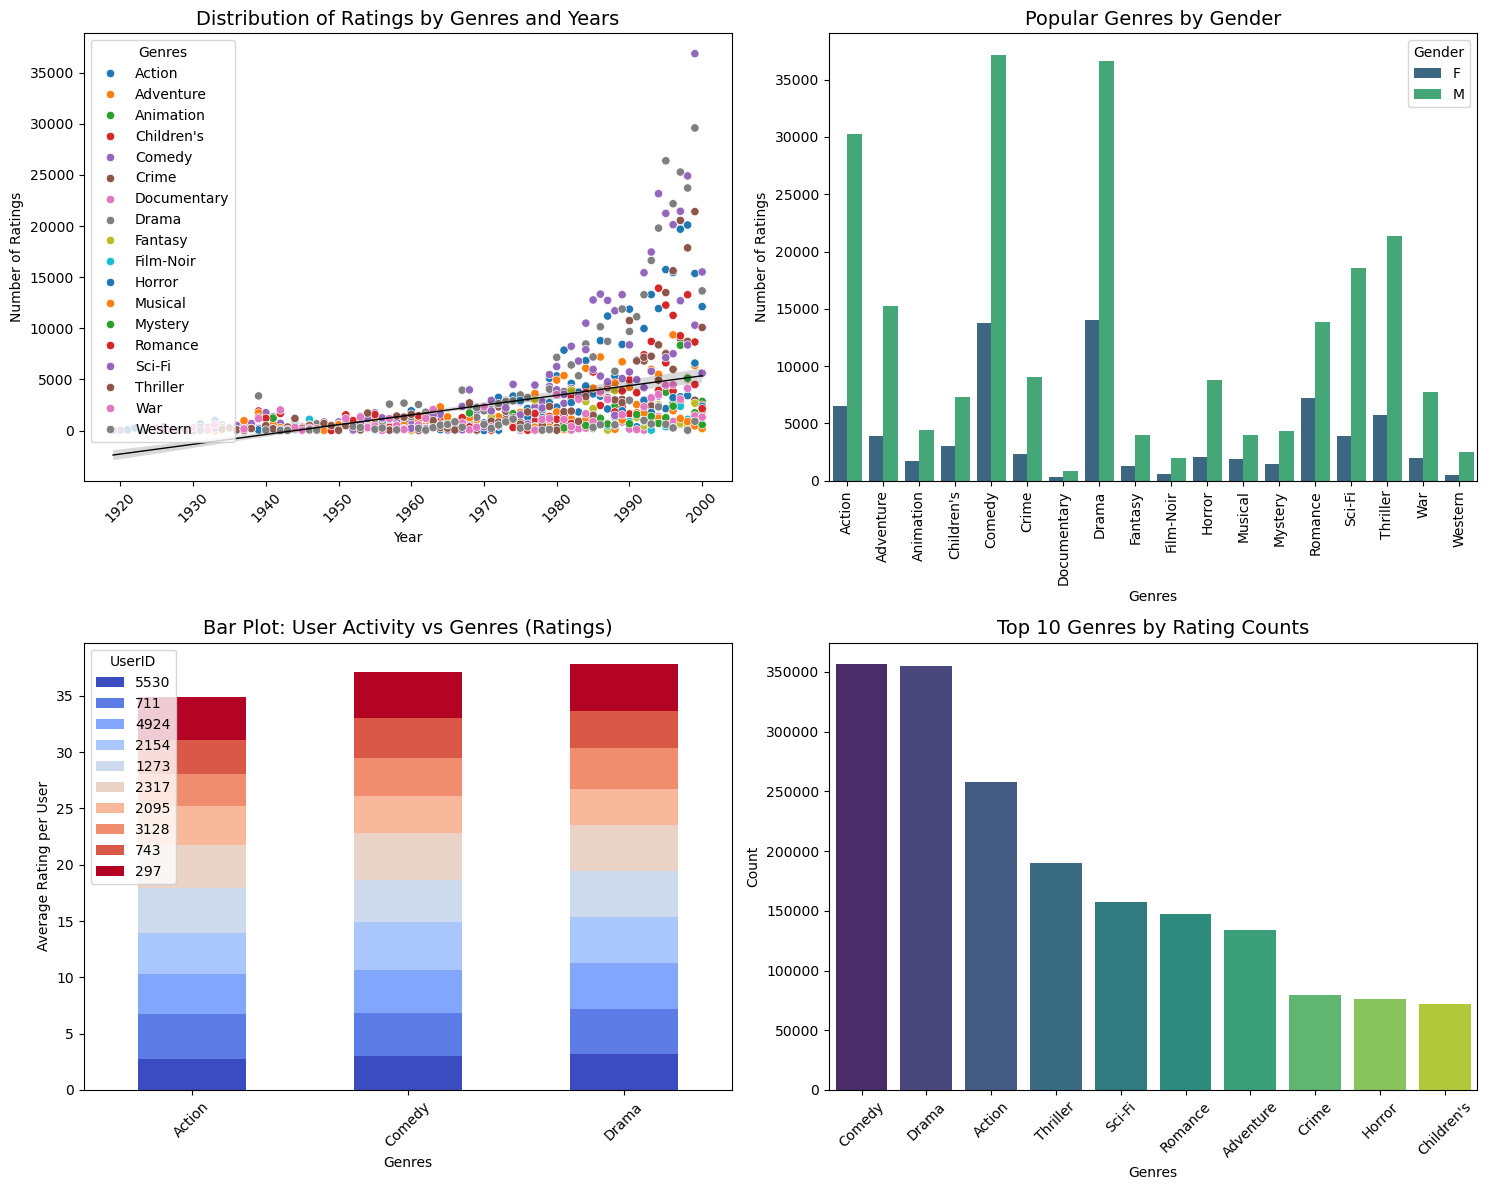

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
movies_path = r"D:\ml-1m\ml-1m\movies.dat"
ratings_path = r"D:\ml-1m\ml-1m\ratings.dat"
users_path = r"D:\ml-1m\ml-1m\users.dat"

# Load the data with proper encoding
movies = pd.read_csv(movies_path, sep="::", names=["MovieID", "Title", "Genres"], engine="python", encoding="ISO-8859-1")
ratings = pd.read_csv(ratings_path, sep="::", names=["UserID", "MovieID", "Rating", "Timestamp"], engine="python", encoding="ISO-8859-1")
users = pd.read_csv(users_path, sep="::", names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], engine="python", encoding="ISO-8859-1")

# Data Preprocessing
movies["Year"] = movies["Title"].str.extract(r"\((\d{4})\)")
movies["Genres"] = movies["Genres"].str.split("|")
ratings["Timestamp"] = pd.to_datetime(ratings["Timestamp"], unit="s")

# Convert Year to numeric, handle errors by coercing invalid values to NaN
movies["Year"] = pd.to_numeric(movies["Year"], errors='coerce')

# Drop rows where Year is NaN
movies = movies.dropna(subset=["Year"])

# Merge datasets
data = pd.merge(ratings, movies, on="MovieID")
data = pd.merge(data, users, on="UserID")

# Q2: Distribution of Ratings by Genres and Years (Modified)
genres_exploded = data.explode("Genres")
genre_year_group = genres_exploded.groupby(["Genres", "Year"]).size().reset_index(name="Count")

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1st Graph: Distribution of Ratings by Genres and Years (Using Scatter Plot)
sns.scatterplot(data=genre_year_group, x="Year", y="Count", hue="Genres", palette="tab10", ax=axes[0, 0])
sns.regplot(data=genre_year_group, x="Year", y="Count", scatter=False, ax=axes[0, 0], color="black", line_kws={"linewidth": 1})
axes[0, 0].set_title("Distribution of Ratings by Genres and Years", fontsize=14)
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Number of Ratings")
axes[0, 0].tick_params(axis="x", rotation=45)

# Q3: Popular Genres by User Demographics (Using Bar Plot)
demographics_genres = genres_exploded.groupby(["Gender", "Age", "Genres"]).size().reset_index(name="Count")
sns.barplot(data=demographics_genres, x="Genres", y="Count", hue="Gender", errorbar=None, palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title("Popular Genres by Gender", fontsize=14)
axes[0, 1].set_xlabel("Genres")
axes[0, 1].set_ylabel("Number of Ratings")
axes[0, 1].tick_params(axis="x", rotation=90)

# Q4: Heatmap for Genre, User Activity, and Ratings (Modified for Fewer Categories)
# Limit to top 3 genres based on rating count
top_genres = genres_exploded["Genres"].value_counts().head(3).index

# Filter data to include only top 3 genres
filtered_genres_exploded = genres_exploded[genres_exploded["Genres"].isin(top_genres)]

# Group by UserID and Genre and calculate average ratings
user_genre_ratings = filtered_genres_exploded.groupby(["UserID", "Genres"])["Rating"].mean().unstack(fill_value=0)

# Sample 10 users for better clarity
sample_users = user_genre_ratings.sample(n=10, random_state=42)  # Sample 10 users for better clarity

# Change the pattern to a bar plot for better readability
sample_users_plot = sample_users.T  # Transpose for better viewing in bar plot format
sample_users_plot.plot(kind="bar", stacked=True, colormap="coolwarm", ax=axes[1, 0])

axes[1, 0].set_title("Bar Plot: User Activity vs Genres (Ratings)", fontsize=14)
axes[1, 0].set_xlabel("Genres")
axes[1, 0].set_ylabel("Average Rating per User")
axes[1, 0].tick_params(axis="x", rotation=45)

# Additional: Top Genres by Rating Counts (Fixed to prevent warnings)
top_genres = genres_exploded["Genres"].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, hue=top_genres.index, palette="viridis", ax=axes[1, 1], legend=False)
axes[1, 1].set_title("Top 10 Genres by Rating Counts", fontsize=14)
axes[1, 1].set_xlabel("Genres")
axes[1, 1].set_ylabel("Count")
axes[1, 1].tick_params(axis="x", rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
